In [34]:
import tensorflow 
from tensorflow import keras
from keras import models,layers,optimizers
import pandas as pd

In [14]:
train_dir = r'D:\Datasets\Face Recognition\train'
validation_dir = r'D:\Datasets\Face Recognition\valid'

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [65]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    horizontal_flip = True,
        )
validation_datagen = ImageDataGenerator(rescale = 1./255)


train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size = (256,256),
        batch_size = 32,
        class_mode = 'binary'
)

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        batch_size = 32,
        target_size = (256,256),
        class_mode = 'binary'
)

Found 3000 images belonging to 5 classes.
Found 914 images belonging to 5 classes.


In [114]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet',include_top = False,input_shape = (256,256,3))

In [115]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [116]:
model = models.Sequential()

model.add(conv_base)

model.add(layers.Flatten())
model.add(layers.Dense(300,activation = 'relu'))
model.add(layers.Dense(5,activation = 'sigmoid'))

In [117]:
model.build(input_shape = (None,256,256,3))
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_9 (ModuleWrap (None, 8, 8, 512)         14714688  
_________________________________________________________________
flatten_14 (Flatten)         (None, 32768)             0         
_________________________________________________________________
dense_38 (Dense)             (None, 300)               9830700   
_________________________________________________________________
dense_39 (Dense)             (None, 5)                 1505      
Total params: 24,546,893
Trainable params: 24,546,893
Non-trainable params: 0
_________________________________________________________________


In [118]:
conv_base.trainable = False

In [119]:
model.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'RMSprop', metrics = ['acc'])

In [120]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 50
)

Epoch 1/30
100/100 [==============================] - 65s 643ms/step - loss: 7.9098 - acc: 0.3451 - val_loss: 1.2645 - val_acc: 0.5668
Epoch 2/30
100/100 [==============================] - 73s 738ms/step - loss: 1.5660 - acc: 0.6004 - val_loss: 1.9342 - val_acc: 0.5388
Epoch 3/30
100/100 [==============================] - 77s 769ms/step - loss: 0.9261 - acc: 0.7300 - val_loss: 0.5535 - val_acc: 0.8104
Epoch 4/30
100/100 [==============================] - 81s 811ms/step - loss: 0.8285 - acc: 0.7405 - val_loss: 0.4288 - val_acc: 0.8241
Epoch 5/30
100/100 [==============================] - 86s 864ms/step - loss: 0.7202 - acc: 0.7577 - val_loss: 0.3769 - val_acc: 0.8518
Epoch 6/30
100/100 [==============================] - 94s 942ms/step - loss: 0.6111 - acc: 0.7955 - val_loss: 0.3068 - val_acc: 0.8919
Epoch 7/30
100/100 [==============================] - 106s 1s/step - loss: 0.5290 - acc: 0.8165 - val_loss: 0.2614 - val_acc: 0.9148
Epoch 8/30
100/100 [==============================] - 118

<function matplotlib.pyplot.show(close=None, block=None)>

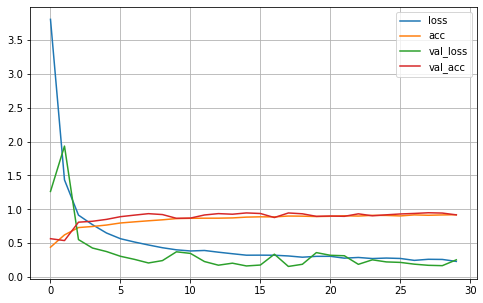

In [122]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show